In [1]:
# What version of Python do you have?
import sys

import tensorflow.keras
import pandas as pd
import sklearn as sk
import tensorflow as tf

print(f"Tensor Flow Version: {tf.__version__}")
print(f"Keras Version: {tensorflow.keras.__version__}")
print()
print(f"Python {sys.version}")
print(f"Pandas {pd.__version__}")
print(f"Scikit-Learn {sk.__version__}")
gpu = len(tf.config.list_physical_devices('GPU'))>0
print("GPU is", "available" if gpu else "NOT AVAILABLE")

Init Plugin
Init Graph Optimizer
Init Kernel
Tensor Flow Version: 2.5.0
Keras Version: 2.5.0

Python 3.9.9 | packaged by conda-forge | (main, Dec 20 2021, 02:41:07) 
[Clang 11.1.0 ]
Pandas 1.3.5
Scikit-Learn 1.0.2
GPU is available


### Different Ways to calculate Gradient

In [3]:
def fu(x1, x2): 
	return x1 ** 2.0 - x1 * 3  + x2 ** 2
def fu_minimzie():
	return x1 ** 2.0 - x1 * 3  + x2 ** 2
def reset():	
	x1 = tf.Variable(10.0) 
	x2 = tf.Variable(10.0) 
	return x1, x2

In [4]:
x1, x2 = reset()
opt = tf.keras.optimizers.SGD(learning_rate=0.1)
for i in range(50):
	print ('y = {:.1f}, x1 = {:.1f}, x2 = {:.1f}'.format(fu(x1, x2).numpy(), x1.numpy(), x2.numpy()))
	opt.minimize(fu_minimzie, var_list=[x1, x2])

Metal device set to: Apple M1
y = 170.0, x1 = 10.0, x2 = 10.0


2022-01-16 00:12:41.940053: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-01-16 00:12:41.940287: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


y = 108.0, x1 = 8.3, x2 = 8.0
y = 68.3, x1 = 6.9, x2 = 6.4
y = 42.9, x1 = 5.9, x2 = 5.1
y = 26.6, x1 = 5.0, x2 = 4.1
y = 16.2, x1 = 4.3, x2 = 3.3
y = 9.6, x1 = 3.7, x2 = 2.6
y = 5.3, x1 = 3.3, x2 = 2.1
y = 2.6, x1 = 2.9, x2 = 1.7
y = 0.9, x1 = 2.6, x2 = 1.3
y = -0.3, x1 = 2.4, x2 = 1.1
y = -1.0, x1 = 2.2, x2 = 0.9
y = -1.4, x1 = 2.1, x2 = 0.7
y = -1.7, x1 = 2.0, x2 = 0.5
y = -1.9, x1 = 1.9, x2 = 0.4
y = -2.0, x1 = 1.8, x2 = 0.4
y = -2.1, x1 = 1.7, x2 = 0.3
y = -2.2, x1 = 1.7, x2 = 0.2
y = -2.2, x1 = 1.7, x2 = 0.2
y = -2.2, x1 = 1.6, x2 = 0.1
y = -2.2, x1 = 1.6, x2 = 0.1
y = -2.2, x1 = 1.6, x2 = 0.1
y = -2.2, x1 = 1.6, x2 = 0.1
y = -2.2, x1 = 1.6, x2 = 0.1
y = -2.2, x1 = 1.5, x2 = 0.0
y = -2.2, x1 = 1.5, x2 = 0.0
y = -2.2, x1 = 1.5, x2 = 0.0
y = -2.2, x1 = 1.5, x2 = 0.0
y = -2.2, x1 = 1.5, x2 = 0.0
y = -2.2, x1 = 1.5, x2 = 0.0
y = -2.2, x1 = 1.5, x2 = 0.0
y = -2.2, x1 = 1.5, x2 = 0.0
y = -2.2, x1 = 1.5, x2 = 0.0
y = -2.2, x1 = 1.5, x2 = 0.0
y = -2.2, x1 = 1.5, x2 = 0.0
y = -2.2, x1 = 1.

In [5]:
x1, x2 = reset()
opt = tf.keras.optimizers.SGD(learning_rate=0.1)
for i in range(50):
	with tf.GradientTape() as tape:
		y = fu(x1, x2)
	grads = tape.gradient(y, [x1, x2])
	processed_grads = [g for g in grads]
	grads_and_vars = zip(processed_grads, [x1, x2])
	print ('y = {:.1f}, x1 = {:.1f}, x2 = {:.1f},  grads0 = {:.1f}, grads1 = {:.1f} '.format(y.numpy(), x1.numpy(), x2.numpy(), grads[0].numpy(), grads[1].numpy()))
	opt.apply_gradients(grads_and_vars)

y = 170.0, x1 = 10.0, x2 = 10.0,  grads0 = 17.0, grads1 = 20.0 
y = 108.0, x1 = 8.3, x2 = 8.0,  grads0 = 13.6, grads1 = 16.0 
y = 68.3, x1 = 6.9, x2 = 6.4,  grads0 = 10.9, grads1 = 12.8 
y = 42.9, x1 = 5.9, x2 = 5.1,  grads0 = 8.7, grads1 = 10.2 
y = 26.6, x1 = 5.0, x2 = 4.1,  grads0 = 7.0, grads1 = 8.2 
y = 16.2, x1 = 4.3, x2 = 3.3,  grads0 = 5.6, grads1 = 6.6 
y = 9.6, x1 = 3.7, x2 = 2.6,  grads0 = 4.5, grads1 = 5.2 
y = 5.3, x1 = 3.3, x2 = 2.1,  grads0 = 3.6, grads1 = 4.2 
y = 2.6, x1 = 2.9, x2 = 1.7,  grads0 = 2.9, grads1 = 3.4 
y = 0.9, x1 = 2.6, x2 = 1.3,  grads0 = 2.3, grads1 = 2.7 
y = -0.3, x1 = 2.4, x2 = 1.1,  grads0 = 1.8, grads1 = 2.1 
y = -1.0, x1 = 2.2, x2 = 0.9,  grads0 = 1.5, grads1 = 1.7 
y = -1.4, x1 = 2.1, x2 = 0.7,  grads0 = 1.2, grads1 = 1.4 
y = -1.7, x1 = 2.0, x2 = 0.5,  grads0 = 0.9, grads1 = 1.1 
y = -1.9, x1 = 1.9, x2 = 0.4,  grads0 = 0.7, grads1 = 0.9 
y = -2.0, x1 = 1.8, x2 = 0.4,  grads0 = 0.6, grads1 = 0.7 
y = -2.1, x1 = 1.7, x2 = 0.3,  grads0 = 0.5, grad

In [2]:
x = tf.constant([[1.,2.,3.],
                [4.,5.,6]])

Metal device set to: Apple M1


2022-01-17 14:34:06.055290: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-01-17 14:34:06.056156: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [4]:
print(x)
print(x.dtype)
print(x.shape)

tf.Tensor(
[[1. 2. 3.]
 [4. 5. 6.]], shape=(2, 3), dtype=float32)
<dtype: 'float32'>
(2, 3)


In [5]:
x + x

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[ 2.,  4.,  6.],
       [ 8., 10., 12.]], dtype=float32)>

In [6]:
5 * x

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[ 5., 10., 15.],
       [20., 25., 30.]], dtype=float32)>

In [7]:
x @tf.transpose(x)

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[14., 32.],
       [32., 77.]], dtype=float32)>

In [8]:
tf.concat([x,x,x],axis=0)

<tf.Tensor: shape=(6, 3), dtype=float32, numpy=
array([[1., 2., 3.],
       [4., 5., 6.],
       [1., 2., 3.],
       [4., 5., 6.],
       [1., 2., 3.],
       [4., 5., 6.]], dtype=float32)>

In [13]:
tf.nn.softmax(x,axis =-1)

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[0.09003057, 0.24472848, 0.665241  ],
       [0.09003057, 0.24472848, 0.665241  ]], dtype=float32)>

In [14]:
import matplotlib
from matplotlib import pyplot as plt

In [15]:
matplotlib.rcParams['figure.figsize'] = [9,6]

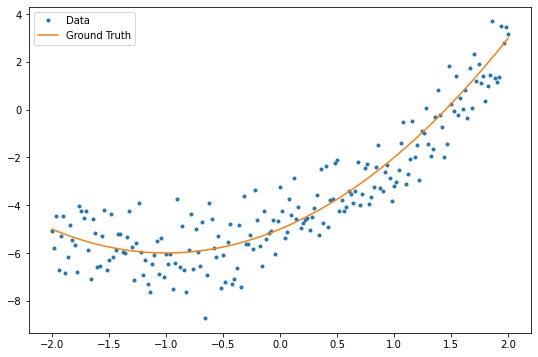

In [16]:
x = tf.linspace(-2,2,201)
x = tf.cast(x, tf.float32)
def f(x):
    y = x**2 + 2*x -5
    return y
y = f(x) + tf.random.normal(shape=[201])
plt.plot(x.numpy(), y.numpy(),'.',label = 'Data')
plt.plot(x,f(x), label='Ground Truth')
plt.legend()

In [20]:
## Create Model
class Model(tf.keras.Model):
    def __init__(self, units):
        super().__init__()
        self.dense1 = tf.keras.layers.Dense(units=units,
                                           activation=tf.nn.relu,
                                           kernel_initializer=tf.random.normal,
                                           bias_initializer=tf.random.normal)
        self.dense2 = tf.keras.layers.Dense(1)
    def call(self,x,training = True):
        x = x[:,tf.newaxis]
        x = self.dense1(x)
        x = self.dense2(x)
        return tf.squeeze(x, axis=1)

In [21]:
model = Model(64)

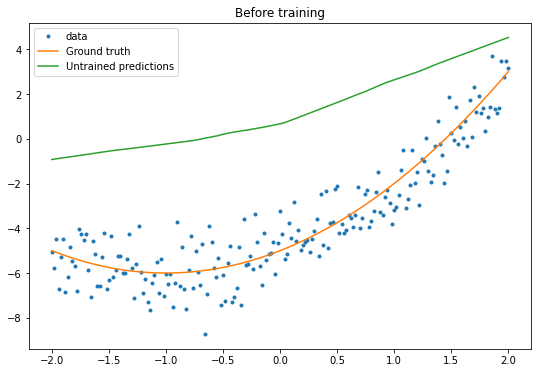

In [22]:
plt.plot(x.numpy(), y.numpy(), '.', label='data')
plt.plot(x, f(x),  label='Ground truth')
plt.plot(x, model(x), label='Untrained predictions')
plt.title('Before training')
plt.legend();

In [24]:
# Basic training loop
variables = model.variables
optimizer = tf.optimizers.SGD(learning_rate=0.01)
for step in range(1000):
    with tf.GradientTape() as tape:
        prediction = model(x)
        error = (y-prediction)**2
        mean_error = tf.reduce_mean(error)
    gradient = tape.gradient(mean_error,variables)
    optimizer.apply_gradients(zip(gradient,variables))
    if step % 100 ==0:
        print(f'Mean Squared Error:{mean_error.numpy():0.3f}')

Mean Squared Error:26.689
Mean Squared Error:0.992
Mean Squared Error:0.960
Mean Squared Error:0.939
Mean Squared Error:0.923
Mean Squared Error:0.912
Mean Squared Error:0.904
Mean Squared Error:0.898
Mean Squared Error:0.894
Mean Squared Error:0.890


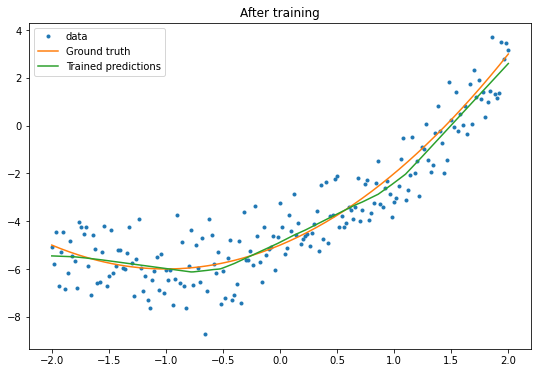

In [25]:
plt.plot(x.numpy(),y.numpy(), '.', label="data")
plt.plot(x, f(x),  label='Ground truth')
plt.plot(x, model(x), label='Trained predictions')
plt.title('After training')
plt.legend();

In [26]:
# Common training utilities already present in tf.keras

In [27]:
new_model = Model(64)
new_model.compile(
    loss=tf.keras.losses.MSE,
    optimizer=tf.optimizers.SGD(learning_rate=0.01))

history = new_model.fit(x, y,
                        epochs=100,
                        batch_size=32,
                        verbose=0)

model.save('./my_model')

2022-01-17 17:23:58.442046: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2022-01-17 17:23:58.445736: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-01-17 17:23:58.586647: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


INFO:tensorflow:Assets written to: ./my_model/assets


2022-01-17 17:24:02.905630: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


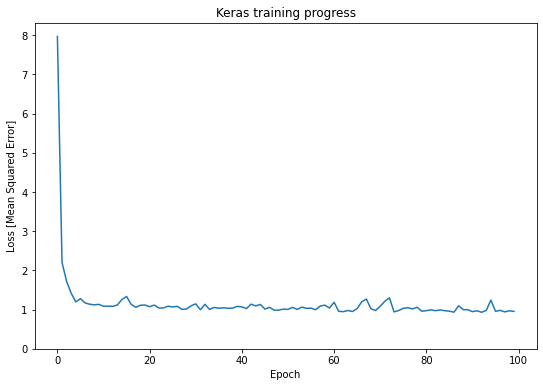

In [28]:
plt.plot(history.history['loss'])
plt.xlabel('Epoch')
plt.ylim([0, max(plt.ylim())])
plt.ylabel('Loss [Mean Squared Error]')
plt.title('Keras training progress');